# 2-5 Matplotlibの基礎
## 2-5-1 Matplotlibを使うための準備

In [2]:
#この章で使用するライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#小数点3位までの表示
%precision 3

'%.3f'

## 2-5-2 散布図

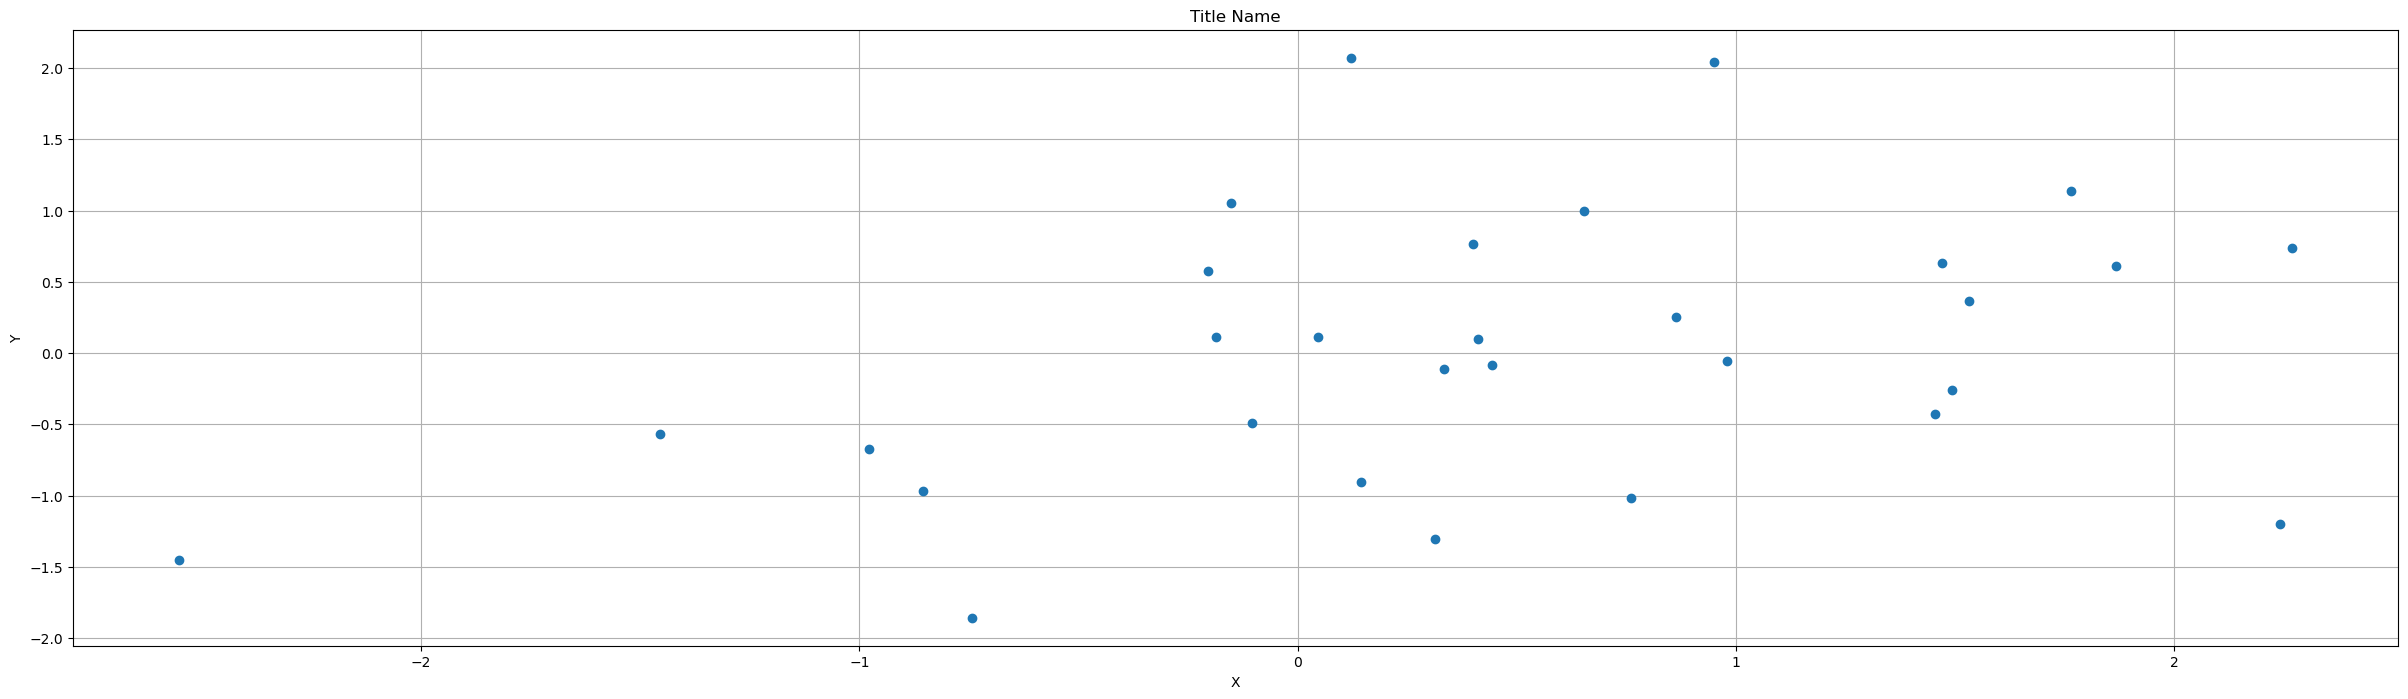

In [3]:
#散布図

#シード値の固定
random.seed(0)

#x軸のデータ
x = np.random.randn(30)

#y軸のデータ
y = np.sin(x) + np.random.randn(30)

#グラフのサイズ指定
plt.figure(figsize=(30,8))

#グラフの描画
plt.plot(x, y, 'o')

#以下のコマンドでも散布図を書くことができる
#plt.scatter(x, y)

#タイトル
plt.title('Title Name')
#Xの座標名
plt.xlabel('X')
#Yの座標名
plt.ylabel('Y')

#grid（グラフの中にある縦線と横線）
plt.grid(True)

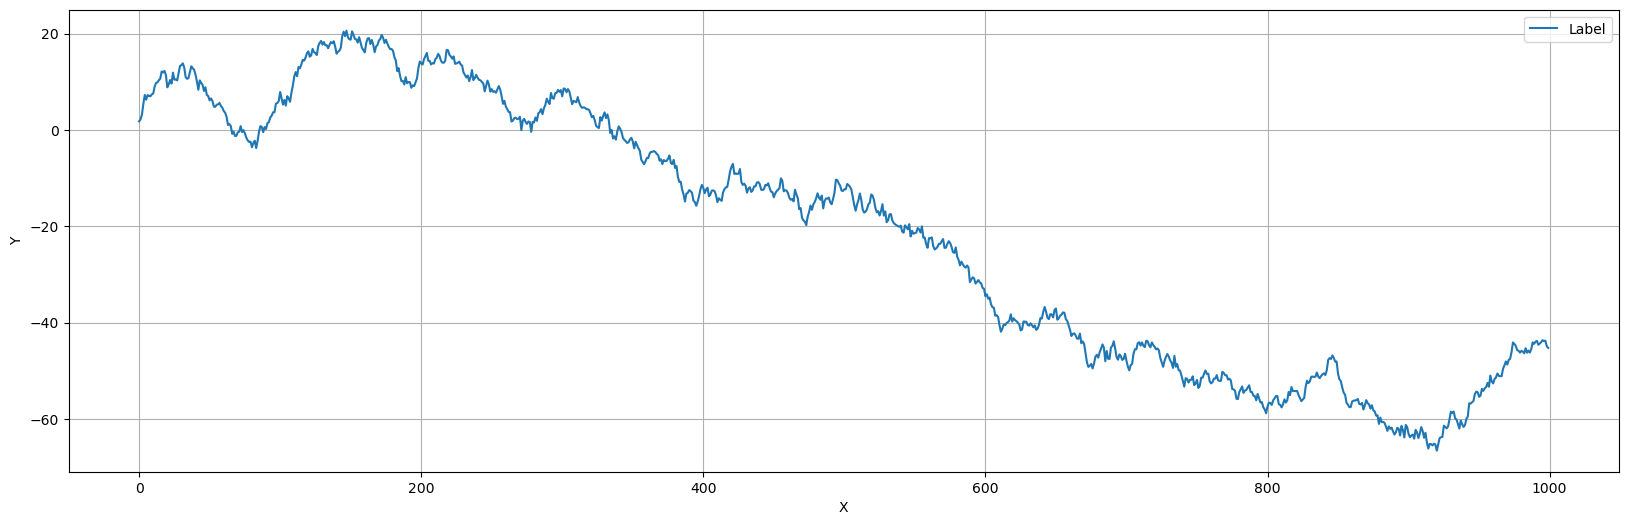

In [4]:
#連続曲線

#シード値の固定
np.random.seed(0)

#データの範囲
numpy_data_x = np.arange(1000)

#乱数の発生と積み上げ
numpy_random_data_y = np.random.randn(1000).cumsum()

#グラフの大きさを指定
plt.figure(figsize=(20,6))

#label=とlegendでラベルをつけることが可能
plt.plot(numpy_data_x, numpy_random_data_y, label = 'Label')
plt.legend()

plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

## 2-5-3 グラフの分割

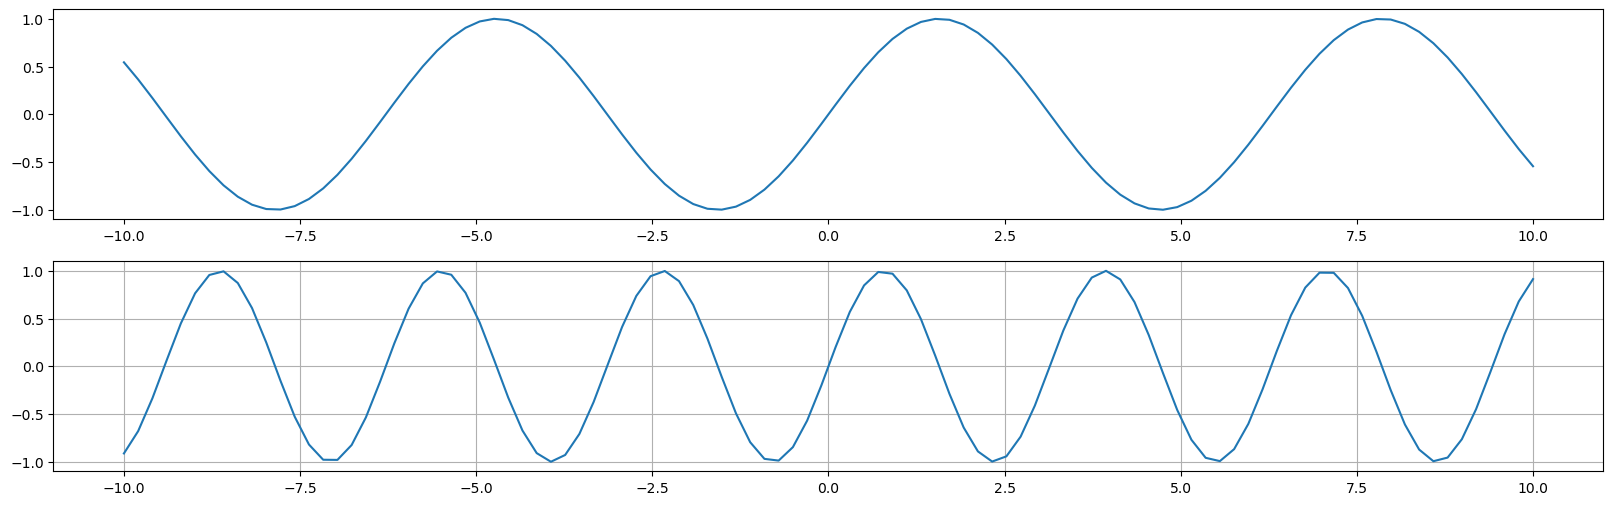

In [5]:
#グラフの分割

#グラフの大きさを指定
plt.figure(figsize=(20,6))

#2行r1列のグラフの一つ目
plt.subplot(2,1,1)

x = np.linspace(-10,10,100)
plt.plot(x, np.sin(x))

#2行1列のグラフの二つ目
plt.subplot(2,1,2)

y = np.linspace(-10, 10, 100)
plt.plot(y, np.sin(2 * y))
plt.grid(True)


### 2-5-4 関数グラフの描画

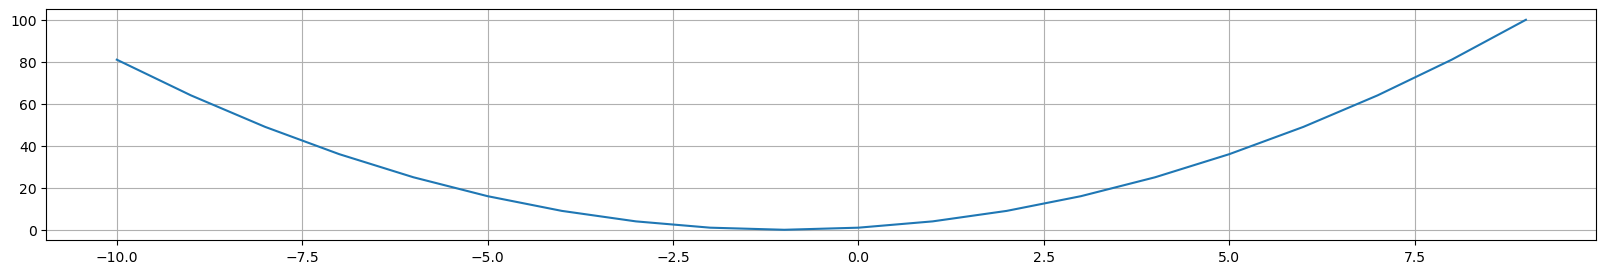

In [8]:
#関数グラフの描画

#関数の定義(Scipyで使用した二次関数と同様)
def my_function(x):
    return x ** 2 + 2 * x + 1

x = np.arange(-10, 10)
plt.figure(figsize=(20, 3))
plt.plot(x, my_function(x)) 
plt.grid(True)

## 2-5-5 ヒストグラム

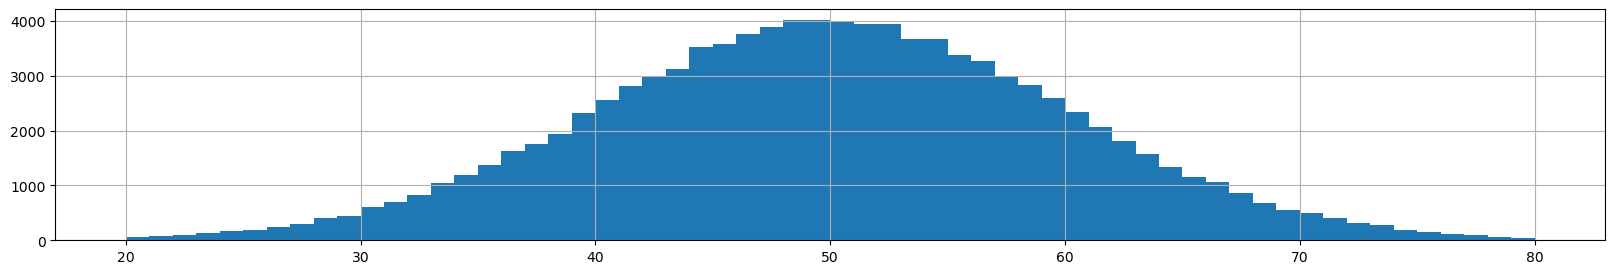

In [9]:
#ヒストグラム

#シードの固定
random.seed(0)
plt.figure(figsize=(20,3))

#20-80の間を60分割したヒストグラムを表示
plt.hist(np.random.randn(10**5) * 10 + 50, bins = 60, range = (20,80))
plt.grid(True)

In [48]:
#?plt.hist

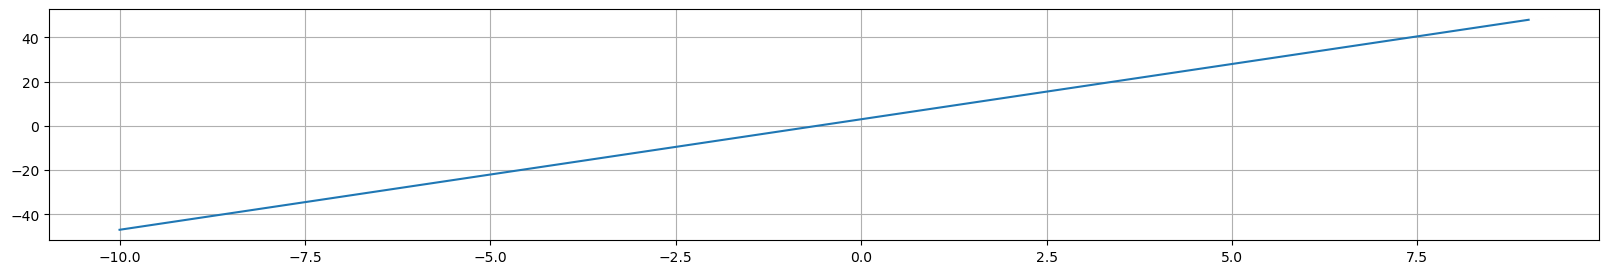

In [49]:
#練習問題2-10：一次関数のグラフ描画
def function(x):
    return 5 * x + 3

x = np.arange(-10, 10)
plt.figure(figsize=(20, 3))
plt.plot(x, function(x))
plt.grid(True)

<function matplotlib.pyplot.show(close=None, block=None)>

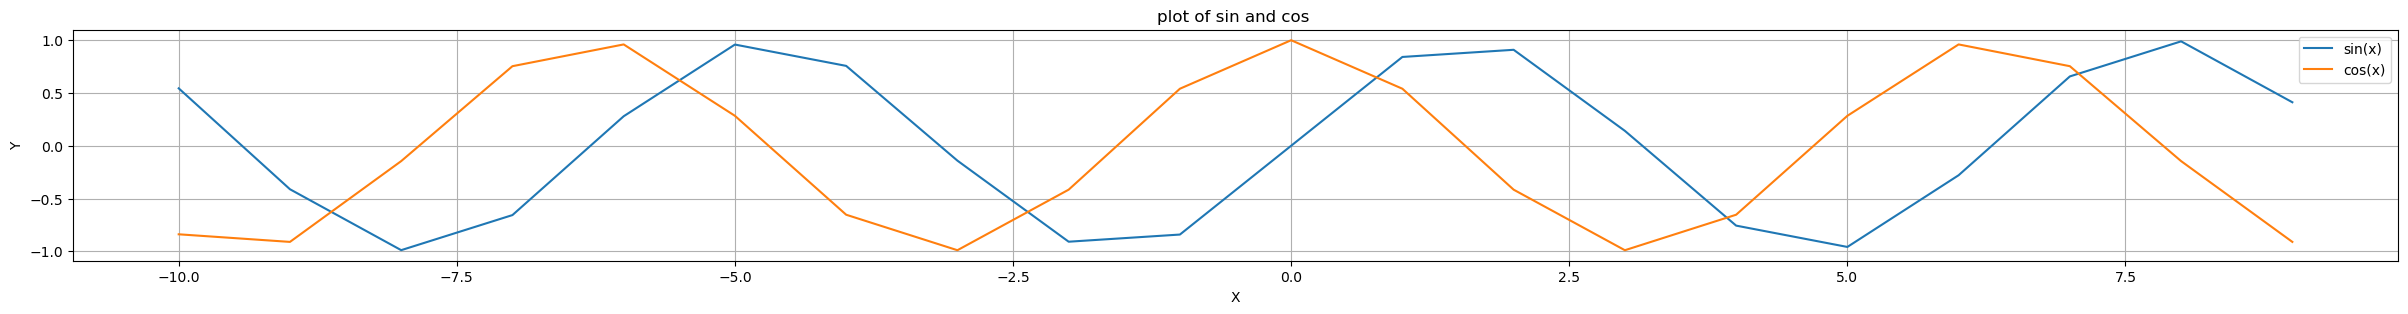

In [50]:
#練習問題2-11：三角関数のグラフを重ね書きする

x = np.arange(-10, 10)

y_sin = np.sin(x)
y_cos = np.cos(x)

plt.figure(figsize=(30,3))

plt.plot(x, y_sin, label='sin(x)')
plt.plot(x, y_cos, label='cos(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('plot of sin and cos ')
plt.legend()
plt.grid(True)
plt.show

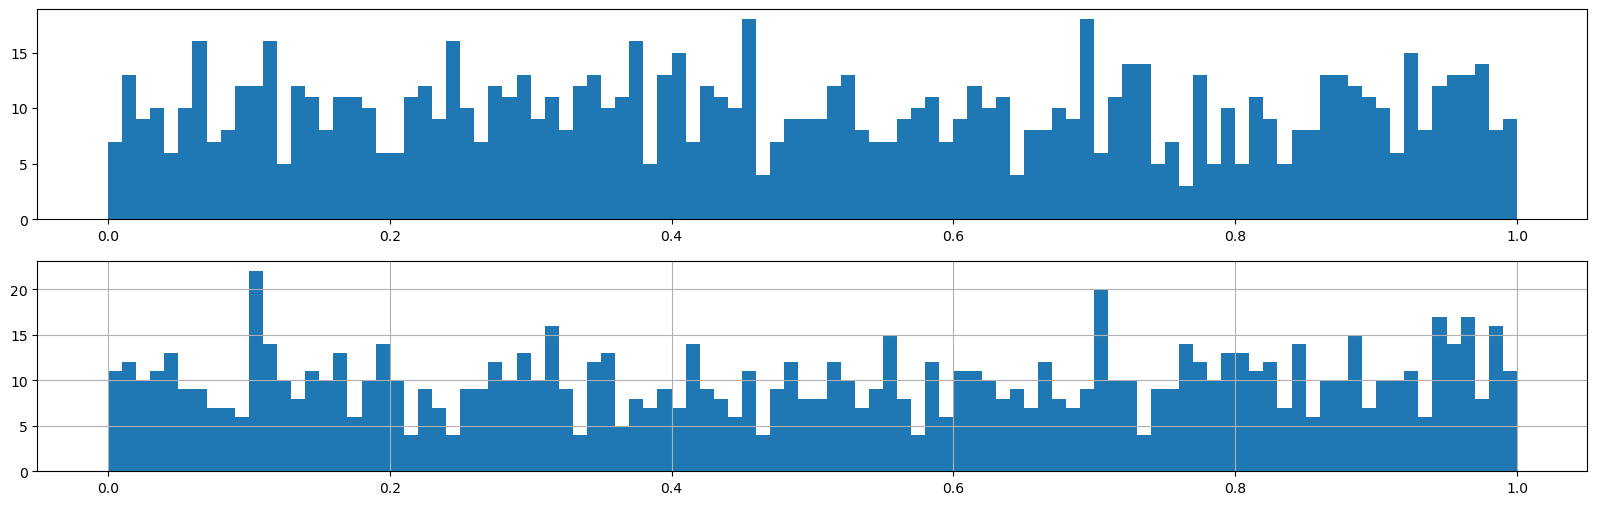

In [54]:
#練習問題2-12

random.seed(0)
#グラフの大きさを指定
plt.figure(figsize=(20,6))

#2行r1列のグラフの一つ目
plt.subplot(2,1,1)

plt.hist(np.random.uniform(0.0, 1.0, 1000), bins = 100, range = (0,1))

#2行1列のグラフの二つ目
plt.subplot(2,1,2)
plt.hist(np.random.uniform(0.0, 1.0, 1000), bins = 100, range = (0,1))
plt.grid(True)

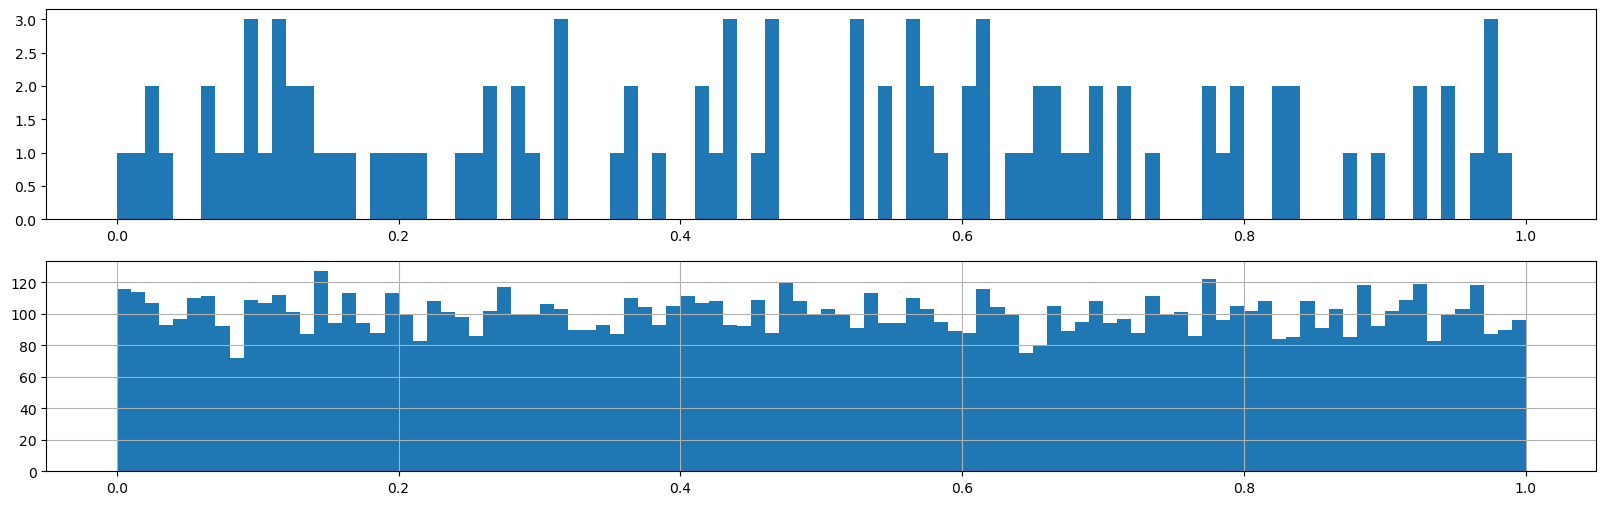

In [55]:
#練習問題2-12

random.seed(0)
#グラフの大きさを指定
plt.figure(figsize=(20,6))

#2行r1列のグラフの一つ目
plt.subplot(2,1,1)

plt.hist(np.random.uniform(0.0, 1.0, 100), bins = 100, range = (0,1))

#2行1列のグラフの二つ目
plt.subplot(2,1,2)
plt.hist(np.random.uniform(0.0, 1.0, 10000), bins = 100, range = (0,1))
plt.grid(True)

円の内部に入った数: 785848
円周率の近似値: 3.143392


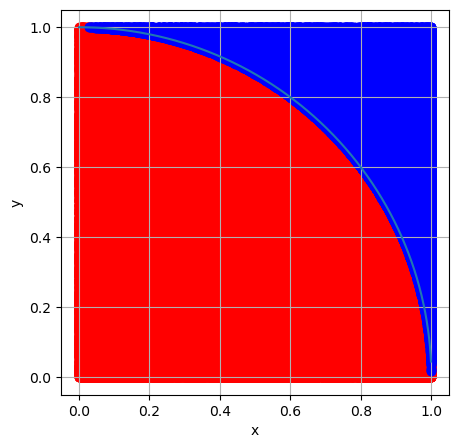

In [70]:
#総合問題2-1：モンテカルロ法
import math

N = 1000000
#first step : 一様分布の乱数の発生
x = np.random.uniform(0.0, 1.0, N)
y = np.random.uniform(0.0, 1.0, N)

#second step　： 円の内部に入る点を数えよう

#円の内部に入ったx,y
inside_x = []
inside_y = []

#円の外に出たx,y
outside_x = []
outside_y = []

count_inside = 0
for count in range(0, N):
    d = math.hypot(x[count], y[count])
    if d < 1:
        count_inside += 1
        #円の内部に入った時のxとyの組み合わせ
        inside_x.append(x[count])
        inside_y.append(y[count])
    else:
        outside_x.append(x[count])
        outside_y.append(y[count])

print("円の内部に入った数:", count_inside) 

#third step

#図のサイズ
plt.figure(figsize=(5,5))

#円を書くためのデータ
circle_x = np.arange(0,1,0.001)
circle_y = np.sqrt(1 - circle_x * circle_x)

#円をかく
plt.plot(circle_x, circle_y)

#円の中に入っているのがred
plt.scatter(inside_x, inside_y, color="r")
#円の外に出たのがblue
plt.scatter(outside_x, outside_y, color="b")

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

print("円周率の近似値:", 4.0 * count_inside / N)